# Wine Quality

Importing the libraries

In [135]:
#Importando as bibliotecas

# Data Analysis Tools
import pandas as pd
import numpy as np

#Plotting
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Tools
import sklearn
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score,roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

#Others
import warnings
warnings.filterwarnings("ignore")


# Importing the data

Importing the dataset created in the "Wine_Quality - Data Analysis"

To create the model, it'll be used the clustered dataset with PCA analysis and some other features to help the model to perform better.

In [136]:
data = pd.read_csv('data_test.csv', sep=',')

In [137]:
data = data.drop(['Unnamed: 0'], axis = 1)


In [138]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red,White,group_quality,Clusters PCA
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,2,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,2,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,2,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,2,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,2,0


In [139]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Red                       int64
White                     int64
group_quality             int64
Clusters PCA              int64
dtype: object

In [140]:
np.all(np.isfinite(data))

True

In [141]:
data = data.dropna(how='any',axis=0)

In [142]:
data_red = data.loc[data['Red'] == 1].copy()
data_white = data.loc[data['White'] == 1].copy()

In [143]:
data_white = data_white.drop(['Red', 'White'],axis = 1)
data_red = data_red.drop(['Red', 'White'],axis = 1)

# Analysing a sort of Classification models

Some ML models will be tested to achive best results

### Classification

In [187]:
def train_classifier_cl(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
   
    return 

def predict_labels_cl(clf, X, y):
    
    y_pred = clf.predict(X)   

    return  {"Precision": precision_score(y.values, y_pred, average='macro'), 
             "Accuracy Score": accuracy_score(y.values, y_pred),
             "Recall": recall_score(y.values, y_pred, average='macro')}

def plot_confusion_matrix(cm, target_names, title='Confusion matrix',cmap=None,normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('confusion_matrix.png', format='png', dpi=100)
    plt.show()
    
def auc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc  = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.savefig('confusion_matrix.png', format='png', dpi=100)
    plt.show()

In [204]:
# Classification Aproach

seed = 13

Classifier = [XGBClassifier(), LogisticRegression(), SVC(), DecisionTreeClassifier(), 
              KNeighborsClassifier(), GaussianNB()]

resultados = { 
        'Model for White Wine': [],
        'Training Set': [], 
        'Testing Set': [],
        'Precision (Training)': [], 
        'Precision (Test)': [],
        'Accuracy Score (Training)':[],
        'Accuracy Score (Test)':[],
        'Recall (Training)':[],
        'Recall (Test)':[],
            }

data_clf = [train_test_split(data_white.drop(['quality'], axis = 1), data_white['quality'], train_size=0.8 , random_state = 1)]

for clf in Classifier:
    for split in data_clf:
        
        
        X_train, X_test, y_train, y_test = split
        
        time_train_cl = train_classifier_cl(clf, X_train, y_train)
        
        time_predict_train_cl = predict_labels_cl(clf, X_train, y_train)
        
        time_predict_test_cl = predict_labels_cl(clf, X_test, y_test)
        
        resultados['Model for White Wine'].append(clf.__class__.__name__)
        resultados['Training Set'].append(X_train.shape)
        resultados['Testing Set'].append(X_test.shape)
        resultados['Precision (Training)'].append(time_predict_train_cl["Precision"])
        resultados['Precision (Test)'].append(time_predict_test_cl["Precision"])
        resultados['Accuracy Score (Training)'].append(time_predict_train_cl["Accuracy Score"])
        resultados['Accuracy Score (Test)'].append(time_predict_test_cl["Accuracy Score"])
        resultados['Recall (Training)'].append(time_predict_train_cl["Recall"])
        resultados['Recall (Test)'].append(time_predict_test_cl["Recall"])
                
                
Results_White = pd.DataFrame(resultados)
Results_White = Results_White[['Model for White Wine','Precision (Training)','Accuracy Score (Training)','Recall (Training)',
                  'Precision (Test)','Accuracy Score (Test)','Recall (Test)','Training Set','Testing Set']]
Results_White.head(10)


,Model for White Wine,Precision (Training),Accuracy Score (Training),Recall (Training),Precision (Test),Accuracy Score (Test),Recall (Test),Training Set,Testing Set
0,XGBClassifier,0.870611,0.689026,0.746337,0.726032,0.620761,0.634778,"(3891, 13)","(973, 13)"
1,LogisticRegression,0.519870,0.561809,0.358286,0.478961,0.586845,0.411973,"(3891, 13)","(973, 13)"
2,SVC,0.777663,0.802621,0.507582,0.449035,0.558068,0.299136,"(3891, 13)","(973, 13)"
3,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.425345,0.606372,0.417374,"(3891, 13)","(973, 13)"
4,KNeighborsClassifier,0.552262,0.646877,0.374798,0.301815,0.459404,0.260629,"(3891, 13)","(973, 13)"
5,GaussianNB,0.617573,0.482652,0.603063,0.632883,0.508736,0.656236,"(3891, 13)","(973, 13)"


In [205]:
# Classification Aproach

seed = 26

Classifier = [XGBClassifier(), LogisticRegression(), SVC(), DecisionTreeClassifier(), 
              KNeighborsClassifier(), GaussianNB()]

resultados = { 
        'Model for Red Wine': [],
        'Training Set': [], 
        'Testing Set': [],
        'Precision (Training)': [], 
        'Precision (test)': [],
        'Accuracy Score (Training)':[],
        'Accuracy Score (test)':[],
        'Recall (Training)':[],
        'Recall (test)':[]
            }

data_clf = [train_test_split(data_red.drop(['quality'], axis = 1), 
                             data_red['quality'], train_size=0.8 , random_state = 1)]

for clf in Classifier:
    for split in data_clf:
        
        
        X_train, X_test, y_train, y_test = split
        
        time_train_cl = train_classifier_cl(clf, X_train, y_train)
        
        time_predict_train_cl = predict_labels_cl(clf, X_train, y_train)
        
        time_predict_test_cl = predict_labels_cl(clf, X_test, y_test)
        
        resultados['Model for Red Wine'].append(clf.__class__.__name__)
        resultados['Training Set'].append(X_train.shape)
        resultados['Testing Set'].append(X_test.shape)
        resultados['Precision (Training)'].append(time_predict_train_cl["Precision"])
        resultados['Precision (test)'].append(time_predict_test_cl["Precision"])
        resultados['Accuracy Score (Training)'].append(time_predict_train_cl["Accuracy Score"])
        resultados['Accuracy Score (test)'].append(time_predict_test_cl["Accuracy Score"])
        resultados['Recall (Training)'].append(time_predict_train_cl["Recall"])
        resultados['Recall (test)'].append(time_predict_test_cl["Recall"])
                
                
Results_red = pd.DataFrame(resultados)
Results_red = Results_red[['Model for Red Wine','Precision (Training)','Accuracy Score (Training)','Recall (Training)',
                  'Precision (test)','Accuracy Score (test)','Recall (test)','Training Set','Testing Set']]
Results_red.head(10)


,Model for Red Wine,Precision (Training),Accuracy Score (Training),Recall (Training),Precision (test),Accuracy Score (test),Recall (test),Training Set,Testing Set
0,XGBClassifier,0.918741,0.820251,0.809426,0.605677,0.686520,0.577520,"(1274, 13)","(319, 13)"
1,LogisticRegression,0.632669,0.598901,0.448074,0.499850,0.586207,0.422588,"(1274, 13)","(319, 13)"
2,SVC,0.552841,0.732339,0.350718,0.374910,0.583072,0.306665,"(1274, 13)","(319, 13)"
3,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.613406,0.661442,0.615317,"(1274, 13)","(319, 13)"
4,KNeighborsClassifier,0.672606,0.662480,0.387217,0.313748,0.501567,0.273190,"(1274, 13)","(319, 13)"
5,GaussianNB,0.641730,0.533752,0.659428,0.543269,0.539185,0.526828,"(1274, 13)","(319, 13)"


In [183]:
# Classification Aproach

seed = 26

Classifier = [XGBClassifier(), LogisticRegression(), SVC(), DecisionTreeClassifier(), 
              KNeighborsClassifier(), GaussianNB()]

resultados = { 
        'Model for Both Wine Types': [],
        'Training Set': [], 
        'Testing Set': [],
        'Precision (Training)': [], 
        'Precision (test)': [],
        'Accuracy Score (Training)':[],
        'Accuracy Score (test)':[],
        'Recall (Training)':[],
        'Recall (test)':[]
            }

data_clf = [train_test_split(data.drop(['quality'], axis = 1), 
                             data['quality'], train_size=0.8 , random_state = 1)]

for clf in Classifier:
    for split in data_clf:
        
        
        X_train, X_test, y_train, y_test = split
        
        time_train_cl = train_classifier_cl(clf, X_train, y_train)
        
        time_predict_train_cl = predict_labels_cl(clf, X_train, y_train)
        
        time_predict_test_cl = predict_labels_cl(clf, X_test, y_test)
        
        resultados['Model for Both Wine Types'].append(clf.__class__.__name__)
        resultados['Training Set'].append(X_train.shape)
        resultados['Testing Set'].append(X_test.shape)
        resultados['Precision (Training)'].append(time_predict_train_cl["Precision"])
        resultados['Precision (test)'].append(time_predict_test_cl["Precision"])
        resultados['Accuracy Score (Training)'].append(time_predict_train_cl["Accuracy Score"])
        resultados['Accuracy Score (test)'].append(time_predict_test_cl["Accuracy Score"])
        resultados['Recall (Training)'].append(time_predict_train_cl["Recall"])
        resultados['Recall (test)'].append(time_predict_test_cl["Recall"])
                
                
Results_data = pd.DataFrame(resultados)
Results_data = Results_data[['Model for Both Wine Types','Precision (Training)','Accuracy Score (Training)','Recall (Training)',
                  'Precision (test)','Accuracy Score (test)','Recall (test)','Training Set','Testing Set']]
Results_data.head(10)


,Model for Both Wine Types,Precision (Training),Accuracy Score (Training),Recall (Training),Precision (test),Accuracy Score (test),Recall (test),Training Set,Testing Set
0,XGBClassifier,0.858103,0.662730,0.704499,0.636081,0.614551,0.526602,"(5165, 15)","(1292, 15)"
1,LogisticRegression,0.662984,0.566699,0.371123,0.391837,0.571981,0.351260,"(5165, 15)","(1292, 15)"
2,SVC,0.758254,0.755470,0.430150,0.539910,0.561920,0.257796,"(5165, 15)","(1292, 15)"
3,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.595025,0.655573,0.535367,"(5165, 15)","(1292, 15)"
4,KNeighborsClassifier,0.524822,0.638529,0.355194,0.280395,0.499226,0.229848,"(5165, 15)","(1292, 15)"
5,GaussianNB,0.512314,0.468151,0.596950,0.513026,0.487616,0.486432,"(5165, 15)","(1292, 15)"


For the white and red wine models there should be an overfitting in the data. It can be seen a very high training score while a medium test score.

In [206]:
Results_White.loc[(Results_White['Precision (Test)'] > 0.60)]

,Model for White Wine,Precision (Training),Accuracy Score (Training),Recall (Training),Precision (Test),Accuracy Score (Test),Recall (Test),Training Set,Testing Set
0,XGBClassifier,0.870611,0.689026,0.746337,0.726032,0.620761,0.634778,"(3891, 13)","(973, 13)"
5,GaussianNB,0.617573,0.482652,0.603063,0.632883,0.508736,0.656236,"(3891, 13)","(973, 13)"


In [207]:
Results_red.loc[(Results_red['Precision (test)'] > 0.60)]

,Model for Red Wine,Precision (Training),Accuracy Score (Training),Recall (Training),Precision (test),Accuracy Score (test),Recall (test),Training Set,Testing Set
0,XGBClassifier,0.918741,0.820251,0.809426,0.605677,0.686520,0.577520,"(1274, 13)","(319, 13)"
3,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.613406,0.661442,0.615317,"(1274, 13)","(319, 13)"


In [208]:
Results_data.loc[(Results_red['Precision (test)'] > 0.60)]

,Model for Both Wine Types,Precision (Training),Accuracy Score (Training),Recall (Training),Precision (test),Accuracy Score (test),Recall (test),Training Set,Testing Set
0,XGBClassifier,0.858103,0.66273,0.704499,0.636081,0.614551,0.526602,"(5165, 15)","(1292, 15)"
3,DecisionTreeClassifier,1.000000,1.00000,1.000000,0.595025,0.655573,0.535367,"(5165, 15)","(1292, 15)"


First, it will be done a new model with XGBoost and evaluate the confusion matrix. As it's written before, false positives are worse than false negatives in our case given the user experience.

Said that, it's important to measure how good the xgboost can be in a confusion matrix and understanding this behavior in a AUC curve.

In [154]:
model = XGBClassifier()

#### Wine Classification XGBoost ####

In [189]:
wine_clf = X_train, X_test, y_train, y_test = train_test_split(data.drop(['quality'], axis = 1),
                                                              data['quality'], 
                                                              train_size=0.8 , 
                                                              random_state = 1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print ("Precision", precision_score(y_test.values, model.predict(X_test), average='macro'), 
         "Accuracy Score", accuracy_score(y_test.values, model.predict(X_test)),
         "Recall", recall_score(y_test.values, model.predict(X_test), average='macro'))


Precision 0.6360813530981597 Accuracy Score 0.6145510835913313 Recall 0.5266016305212494


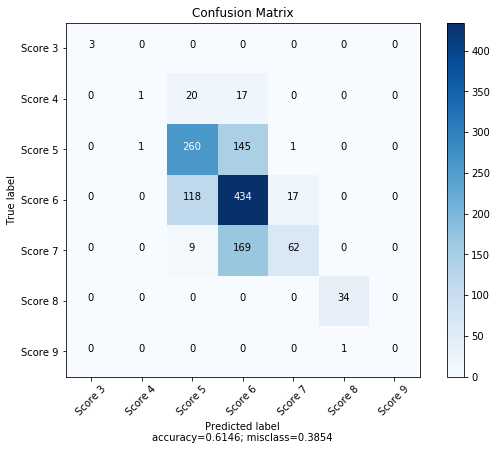

In [190]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['Score 3', 'Score 4', 'Score 5', 
                                      'Score 6', 'Score 7', 'Score 8', 'Score 9'],
                      title        = "Confusion Matrix")

## White Wine

In [191]:
white_wine_clf = X_train, X_test, y_train, y_test = train_test_split(data_white.drop(['quality'], axis = 1),
                                                              data_white['quality'], 
                                                              train_size=0.8 , 
                                                              random_state = 1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print ("Precision", precision_score(y_test.values, model.predict(X_test), average='macro'), 
 "Accuracy Score", accuracy_score(y_test.values, model.predict(X_test)),
 "Recall", recall_score(y_test.values, model.predict(X_test), average='macro'))

Precision 0.726032011526745 Accuracy Score 0.6207605344295992 Recall 0.634778064351562


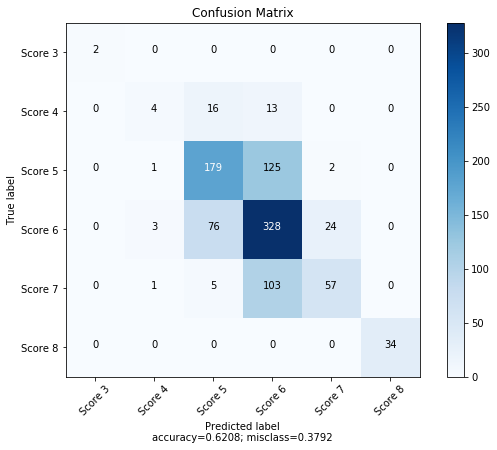

In [192]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['Score 3', 'Score 4', 'Score 5', 
                                      'Score 6', 'Score 7', 'Score 8'],
                      title        = "Confusion Matrix")

## Red Wine

In [193]:
red_wine_clf = X_train, X_test, y_train, y_test = train_test_split(data_red.drop(['quality'], axis = 1),
                                                              data_red['quality'], 
                                                              train_size=0.8 , 
                                                              random_state = 1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print ("Precision", precision_score(y_test.values, model.predict(X_test), average='macro'), 
 "Accuracy Score", accuracy_score(y_test.values, model.predict(X_test)),
 "Recall", recall_score(y_test.values, model.predict(X_test), average='macro'))

Precision 0.6056769870244813 Accuracy Score 0.6865203761755486 Recall 0.5775204565030145


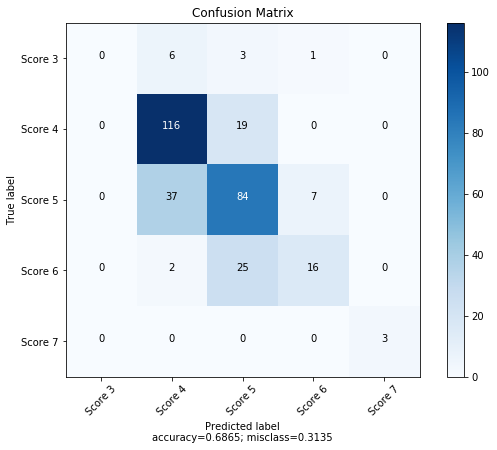

In [194]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['Score 3', 'Score 4', 'Score 5', 
                                      'Score 6', 'Score 7'],
                      title        = "Confusion Matrix")

# Grid Search

After selecting the best possible model based on accuracy, precision and recall, the Grid Search technique will be applied to achieve the best hyperparameters combination for the XGBoost classifier.

The metric selected for this fit will be the **accuracy** since it measures how good the model is when predicting the quality of the wine.

In [66]:
def recall(y_true, y_predict):
    
    recall = recall_score(y_true, y_predict, average='macro')

    return recall

In [67]:
def precision(y_true, y_predict):
    
    precision = precision_score(y_true, y_predict, average='macro')

    return precision

In [68]:
def accuracy(y_true, y_predict):
    
    accuracy = accuracy_score(y_true, y_predict)

    return accuracy

In [69]:
def fit_model(X, y):

    from xgboost import XGBClassifier as xgb
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 1)

    estimator = xgb()
   

    Params = {'n_estimators':[100,150,200], 
          'learning_rate':[0.05,0.07,0.4],
          'colsample_bytree':[0.5,0.7,1],
          'max_depth':[5,7,10],
          'subsample':[0.6,0.7,0.8],
          'gamma': [0, 0.1, 0.3]
         }
#     scoring_fnc = {'Precision': make_scorer(precision), 'Accuracy': make_scorer(accuracy),
#                   'recall': make_scorer(recall)}

    scoring_fnc = make_scorer(accuracy)
    

    grid = GridSearchCV( estimator=estimator, param_grid=Params, scoring=scoring_fnc, cv=cv_sets)
    #grid = GridSearchCV( estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets2)

    grid = grid.fit(X, y)

    return grid.best_estimator_

Fitting the model with the best hyperparameters using the Grid Search.

1. Red Wine Dataset
2. White Wine Dataset
3. Complete Wine Dataset

**Red Wine Hyperparameters optimization**

In [155]:
reg = fit_model(data_red.drop(['quality'], axis = 1), data_red['quality'])

In [156]:
print ("O parâmetro 'n_estimators' é {} para o modelo ótimo.".format(reg.get_params()['n_estimators']))
print ("O parâmetro 'learning_rate' é {} para o modelo ótimo.".format(reg.get_params()['learning_rate']))
print ("O parâmetro 'colsample_bytree' é {} para o modelo ótimo.".format(reg.get_params()['colsample_bytree']))
print ("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))
print ("O parâmetro 'subsample' é {} para o modelo ótimo.".format(reg.get_params()['subsample']))
print ("O parâmetro 'gamma' é {} para o modelo ótimo.".format(reg.get_params()['gamma']))

O parâmetro 'n_estimators' é 100 para o modelo ótimo.
O parâmetro 'learning_rate' é 0.07 para o modelo ótimo.
O parâmetro 'colsample_bytree' é 0.7 para o modelo ótimo.
O parâmetro 'max_depth' é 7 para o modelo ótimo.
O parâmetro 'subsample' é 0.8 para o modelo ótimo.
O parâmetro 'gamma' é 0 para o modelo ótimo.


**White Wine Hyperparameters optimization**

In [30]:
reg = fit_model(data_white.drop(['quality'], axis = 1), data_white['quality'])

In [31]:
print ("O parâmetro 'n_estimators' é {} para o modelo ótimo.".format(reg.get_params()['n_estimators']))
print ("O parâmetro 'learning_rate' é {} para o modelo ótimo.".format(reg.get_params()['learning_rate']))
print ("O parâmetro 'colsample_bytree' é {} para o modelo ótimo.".format(reg.get_params()['colsample_bytree']))
print ("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))
print ("O parâmetro 'subsample' é {} para o modelo ótimo.".format(reg.get_params()['subsample']))
print ("O parâmetro 'gamma' é {} para o modelo ótimo.".format(reg.get_params()['gamma']))

O parâmetro 'n_estimators' é 200 para o modelo ótimo.
O parâmetro 'learning_rate' é 0.05 para o modelo ótimo.
O parâmetro 'colsample_bytree' é 0.5 para o modelo ótimo.
O parâmetro 'max_depth' é 10 para o modelo ótimo.
O parâmetro 'subsample' é 0.8 para o modelo ótimo.
O parâmetro 'gamma' é 0.1 para o modelo ótimo.


**Complete Wine Dataset Hyperparameters optimization**

In [32]:
reg = fit_model(data.drop(['quality'], axis = 1), data['quality'])

In [33]:
print ("O parâmetro 'n_estimators' é {} para o modelo ótimo.".format(reg.get_params()['n_estimators']))
print ("O parâmetro 'learning_rate' é {} para o modelo ótimo.".format(reg.get_params()['learning_rate']))
print ("O parâmetro 'colsample_bytree' é {} para o modelo ótimo.".format(reg.get_params()['colsample_bytree']))
print ("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))
print ("O parâmetro 'subsample' é {} para o modelo ótimo.".format(reg.get_params()['subsample']))
print ("O parâmetro 'gamma' é {} para o modelo ótimo.".format(reg.get_params()['gamma']))

O parâmetro 'n_estimators' é 200 para o modelo ótimo.
O parâmetro 'learning_rate' é 0.05 para o modelo ótimo.
O parâmetro 'colsample_bytree' é 0.7 para o modelo ótimo.
O parâmetro 'max_depth' é 10 para o modelo ótimo.
O parâmetro 'subsample' é 0.8 para o modelo ótimo.
O parâmetro 'gamma' é 0 para o modelo ótimo.


## Tuning the model with hyperparameters

Given the hyperparameters for the three datasets (Red wine, White wine and full dataset) once again the models will be trained and the scores (precision, accuracy and recall) will be evaluated.

After this step, a confusion matrix will be evaluated and the results analysed. 

#### Final model - Red Wine

In [209]:
red_wine_model = XGBClassifier(n_estimators=100, 
                      learning_rate=0.07, 
                      gamma=0, 
                      subsample=0.8,
                      colsample_bytree=0.7, 
                      max_depth=7)

seed = 1

In [210]:
X_train, X_test, y_train, y_test = train_test_split(data_red.drop(['quality'], axis = 1),
                                                              data_red['quality'], 
                                                              train_size=0.8 , 
                                                              random_state = 1)

red_wine_model.fit(X_train, y_train)
y_pred = red_wine_model.predict(X_test)

print ("Precision", precision_score(y_test.values, y_pred, average='macro'), 
         "Accuracy Score", accuracy_score(y_test.values, y_pred),
         "Recall", recall_score(y_test.values, y_pred, average='macro'))

Precision 0.6501940048691418 Accuracy Score 0.7398119122257053 Recall 0.6317999031007753


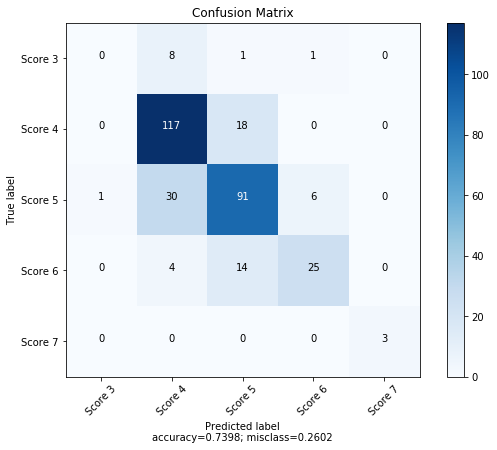

In [211]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['Score 3', 'Score 4', 'Score 5', 
                                      'Score 6', 'Score 7'],
                      title        = "Confusion Matrix")

#### Final model - White Wine

In [212]:
white_wine_model = XGBClassifier(n_estimators=200, 
                      learning_rate=0.05, 
                      gamma=0.1, 
                      subsample=0.8,
                      colsample_bytree=0.5, 
                      max_depth=10)
seed = 2

In [213]:
X_train, X_test, y_train, y_test = train_test_split(data_white.drop(['quality'], axis = 1),
                                                              data_white['quality'], 
                                                              train_size=0.8 , 
                                                              random_state = 1)

white_wine_model.fit(X_train, y_train)
y_pred = white_wine_model.predict(X_test)

print ("Precision", precision_score(y_test.values, y_pred, average='macro'), 
         "Accuracy Score", accuracy_score(y_test.values, y_pred),
         "Recall", recall_score(y_test.values, y_pred, average='macro'))

Precision 0.8105996309359318 Accuracy Score 0.723535457348407 Recall 0.7009817683503531


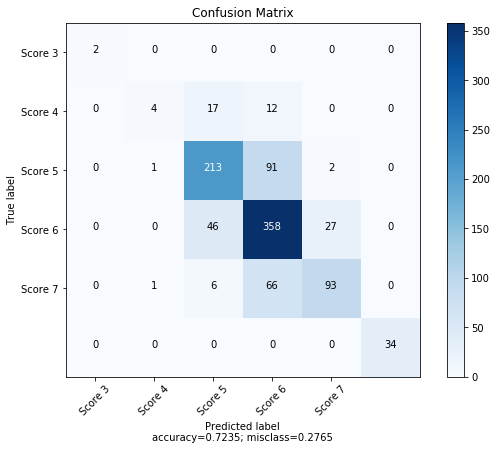

In [214]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['Score 3', 'Score 4', 'Score 5', 
                                      'Score 6', 'Score 7'],
                      title        = "Confusion Matrix")

#### Final model - Complete dataset

In [219]:
wine_model = XGBClassifier(n_estimators=200, 
                      learning_rate=0.05, 
                      gamma=0, 
                      subsample=0.8,
                      colsample_bytree=0.7, 
                      max_depth=10)
seed = 3

In [220]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['quality'], axis = 1),
                                                              data['quality'], 
                                                              train_size=0.8 , 
                                                              random_state = 1)

wine_model.fit(X_train, y_train)
y_pred = wine_model.predict(X_test)

print ("Precision", precision_score(y_test.values, y_pred, average='macro'), 
         "Accuracy Score", accuracy_score(y_test.values, y_pred),
         "Recall", recall_score(y_test.values, y_pred, average='macro'))

Precision 0.6948060119171313 Accuracy Score 0.7352941176470589 Recall 0.6197813406501317


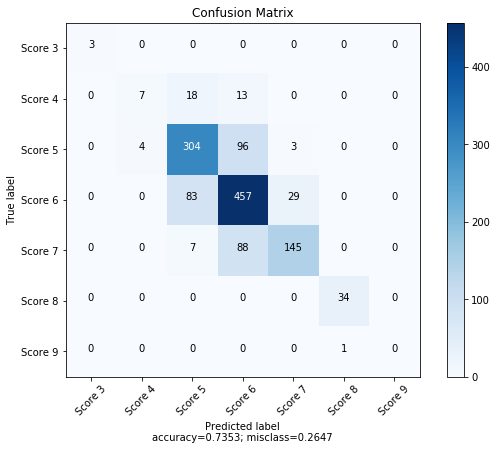

In [222]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['Score 3', 'Score 4', 'Score 5', 
                                      'Score 6', 'Score 7','Score 8','Score 9'],
                      title        = "Confusion Matrix")